In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from google.colab import files
uploaded = files.upload()

Saving shakespeare.txt to shakespeare (3).txt


In [3]:
!ls

 sample_data	       'shakespeare (2).txt'   shakespeare.txt
'shakespeare (1).txt'  'shakespeare (3).txt'


In [4]:
with open('shakespeare.txt', 'r', encoding='utf-8') as f:
    text = f.read()

text = text[:100000]  # reduce to 100k chars
text = text.lower()

print("Length of reduced text:", len(text))

Length of reduced text: 100000


In [5]:
chars = sorted(list(set(text)))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for i, c in enumerate(chars)}
vocab_size = len(chars)
print("Total unique characters:", vocab_size)

Total unique characters: 55


In [6]:
seq_length = 100
dataX = []
dataY = []
for i in range(0, len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total input-output patterns:", n_patterns)

Total input-output patterns: 99900


In [7]:
import numpy as np
X = np.reshape(dataX, (n_patterns, seq_length, 1))
X = X / float(vocab_size)
print("Input shape:", X.shape)

Input shape: (99900, 100, 1)


In [8]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(dataY)
print("Output shape:", y.shape)

Output shape: (99900, 54)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 54)             │         6,966 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,526 (287.21 KB)

 Trainable params: 73,526 (287.21 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X, y, epochs=10, batch_size=128)

Epoch 1/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.5680
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 2.5354
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.5176
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 2.5045
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.4806
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.4733
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 2.4568
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.4453
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 2.4366
Epoch 10/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 2.4250


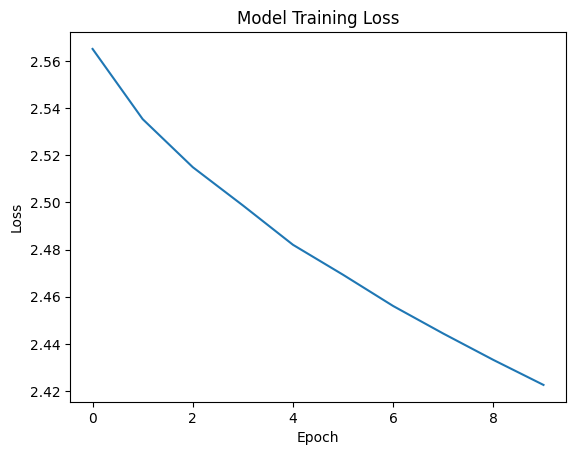

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [12]:
import sys
import random
start_index = random.randint(0, len(dataX)-1)
pattern = dataX[start_index]
print("Seed:")
print("\"" + ''.join([int_to_char[value] for value in pattern]) + "\"")
generated_text = ""
for i in range(500):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(vocab_size)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    generated_text += result
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print("\nGenerated Text:\n")
print(generated_text)

Seed:
"ly april of her prime,
so thou through windows of thine age shalt see,
despite of wrinkles this thy "

Generated Text:

ho the sore,
and the tore the tore the tore the tore 
and the tore the tore the tore the tore 
and the tore the tore the tore the tore 
and the tore the tore the tore the tore 
and the tore the tore the tore the tore 
and the tore the tore the tore the tore 
and the tore the tore the tore the tore 
and the tore the tore the tore the tore 
and the tore the tore the tore the tore 
and the tore the tore the tore the tore 
and the tore the tore the tore the tore 
and the tore the tore the tore the t
